# Go with the Flow: Up and Running with TensorFlow
## Installing TensorFlow
If you are using a clean Python installation (probably set up for the purpose of learning TensorFlow), you can get started with the simple pip installation:

$ pip install tensorflow<br>

This approach does, however, have the drawback that TensorFlow will override existing packages and install specific versions to satisfy dependencies. If you are using this Python installation for other purposes as well, this will not do. One common way around this is to install TensorFlow in a virtual environment, managed by a utility called virtualenv.

Depending on your setup, you may or may not need to install virtualenv on your machine. To install virtualenv, type:

$ pip install virtualenv<br>

See http://virtualenv.pypa.io for further instructions.

In order to install TensorFlow in a virtual environment, you must first create the virtual environment

$ cd ~
$ mkdir envs
$ virtualenv ~/envs/tensorflow<br>

This will create a virtual environment named tensorflow in ~/envs (which will manifest as the folder ~/envs/tensorflow). To activate the environment, use:

$ source ~/envs/tensorflow/bin/activate<br>

The prompt should now change to indicate the activated environment:

(tensorflow)$<br>

At this point the pip install command:

(tensorflow)$ pip install tensorflow<br>

will install TensorFlow into the virtual environment, without impacting other packages installed on your machine.

Finally, in order to exit the virtual environment, you type:

(tensorflow)$ deactivate<br>

at which point you should get back the regular prompt:

$


## ADDING AN ALIAS TO ~/.BASHRC
The process described for entering and exiting your virtual environment might be too cumbersome if you intend to use it often. In this case, you can simply append the following command to your ~/.bashrc file:

alias tensorflow="source ~/envs/tensorflow/bin/activate"<br>
and use the command tensorflow to activate the virtual environment. To quit the environment, you will still use deactivate.

## Hello World
First, we run a simple install and version check (if you used the virtualenv installation option, make sure to activate it before running TensorFlow code):

In [3]:
import tensorflow as tf
print(tf.__version__)

1.11.0


Next define the constants "Hello" and " World!", and combine them:

In [4]:
h = tf.constant("Hello")
w = tf.constant(" World!")
hw = h + w 

At this point, you might wonder how (if at all) this is different from the simple Python code for doing this:

In [5]:
ph = "Hello"
pw = " World!"
phw = ph + pw

The key point here is what the variable hw contains in each case. We can check this using the print command. In the pure Python case we get this:



In [6]:
print(phw)

Hello World!


In the TensorFlow case, however, the output is completely different:

In [7]:
print(hw)

Tensor("add:0", shape=(), dtype=string)


TensorFlow uses the computation graph model. The key idea behind computation graphs in TensorFlow is that we first define what computations should take place, and then trigger the computation in an external mechanism. Thus, the TensorFlow line of code:

In [8]:
hw = h + w 

does not compute the sum of h and w, but rather adds the summation operation to a graph of computations to be done later.

Next, the Session object acts as an interface to the external TensorFlow computation mechanism, and allows us to run parts of the computation graph we have already defined. The line:



In [9]:
with tf.Session() as sess:
    ans = sess.run(hw)
print(ans.decode())

Hello World!


## Train your first neural network: basic classification

This guide trains a neural network model to classify images of clothing, like sneakers and shirts.

In [10]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


## Import the Fashion MNIST dataset
This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:
![Image of Fashion MNIST](https://tensorflow.org/images/fashion-mnist-sprite.png)

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

-  The train_images and train_labels arrays are the training set—the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

<tbody><tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</tbody>

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:



In [13]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [14]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [16]:
test_images.shape

(10000, 28, 28)

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:



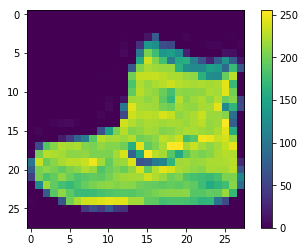

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. Here's the function to preprocess the images:

It's important that the training set and the testing set are preprocessed in the same way:

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

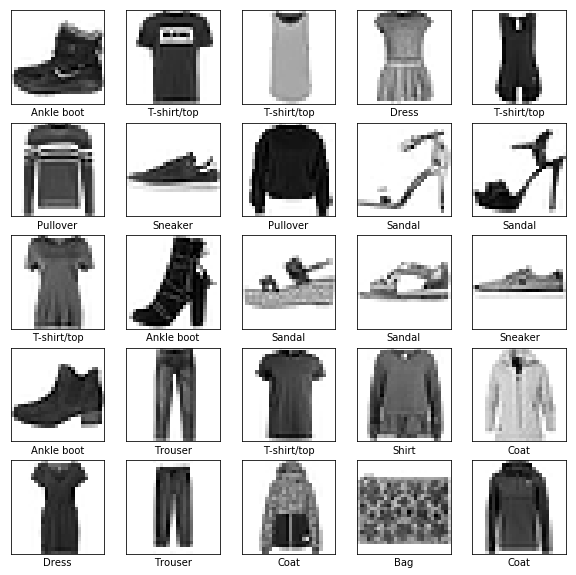

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.<br>
- Optimizer —This is how the model is updated based on the data it sees and its loss function.<br>
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [21]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—the model is "fit" to the training data:

In [22]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.4936 - acc: 0.8259
Epoch 2/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.3692 - acc: 0.8666
Epoch 3/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.3305 - acc: 0.8785
Epoch 4/5
60000/60000 [==============================] - 8s 141us/step - loss: 0.3097 - acc: 0.8863
Epoch 5/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.2910 - acc: 0.8924


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 66us/step
Test accuracy: 0.8734


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

## Make predictions
With the model trained, we can use it to make predictions about some images.

In [24]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [25]:
predictions[0]


array([2.8522875e-06, 1.4073352e-07, 5.4640309e-06, 1.3520214e-07,
       3.2372386e-06, 8.8104550e-03, 3.0021120e-05, 1.1862323e-01,
       1.3488083e-05, 8.7251091e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [26]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct:

In [27]:
test_labels[0]

9

We can graph this to look at the full set of 10 channels

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

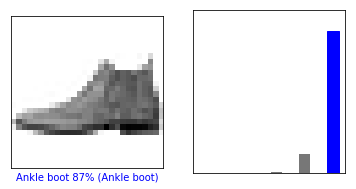

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

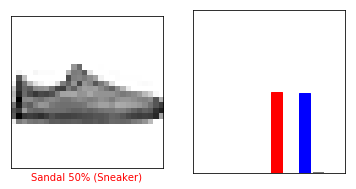

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

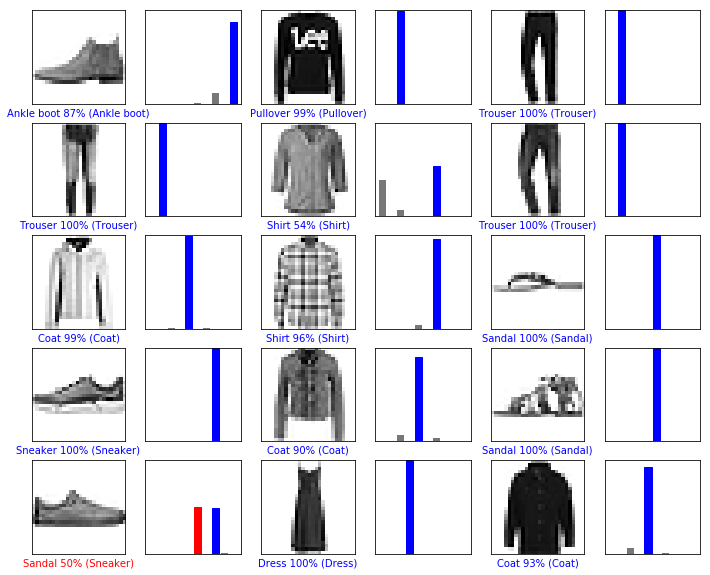

In [31]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Finally, use the trained model to make a prediction about a single image.

In [32]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [33]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

In [34]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.85229089e-06 1.40733690e-07 5.46402680e-06 1.35202029e-07
  3.23723930e-06 8.81044846e-03 3.00211268e-05 1.18623085e-01
  1.34880602e-05 8.72511089e-01]]


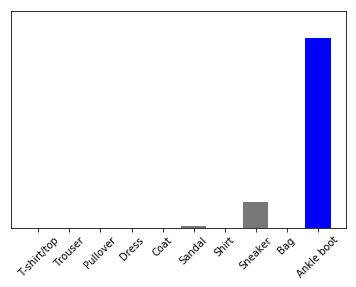

In [35]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [36]:
np.argmax(predictions_single[0])

9

And, as before, the model predicts a label of 9.

## Tensorboard
TensorBoard is a visualization tool included with TensorFlow that enables you to visualize dynamic graphs of your Keras training and test metrics, as well as activation histograms for the different layers in your model.

In [38]:
keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0,  
          write_graph=True, write_images=True)

In [39]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

In [40]:
model.fit(train_images, train_labels, callbacks=[tbCallBack])


Epoch 1/1
60000/60000 [==============================] - 10s 173us/step - loss: 0.2771 - acc: 0.8971


In [43]:
!tensorboard --logdir=Graph2

TensorBoard 1.11.0 at http://Benjamins-MacBook-Pro-2.local:6006 (Press CTRL+C to quit)
^C
